## MSIN0097 - Predictive Analytics Coursework

Fraud detection is a critical problem in the financial industry, where undetected fraudulent activities can lead to significant financial losses.
The goal of this project is to develop a predictive model that can accurately detect fraudulent transactions.
By using machine learning techniques, we explore different models to choose the best one that ensures fraudulent transactions are caught.

In [2]:
#Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.preprocessing import StandardScaler # Import StandardScaler
!pip install imblearn
from imblearn.over_sampling import SMOTE # Import the SMOTE class from imblearn.over_sampling
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
!pip install xgboost
import xgboost as xgb
from collections import Counter
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from matplotlib.patches import Circle, FancyArrowPatch
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

2025-03-09 11:32:52.720970: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741519972.749496     563 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741519972.761062     563 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 11:32:52.792899: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download the Dataset

## Dataset Information :
Samay Deepak Ashar. (2025). Fraud Detection Transactions Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/10816530


In [3]:
# Load the dataset
file_path = "synthetic_fraud_dataset.csv"  # Make sure the dataset is in the working directory
df = pd.read_csv(file_path)

## Data Exploration

## Take a Quick Look at the Data Structure

## Understanding the Dataset
Before proceeding with modeling, it’s crucial to explore the dataset and understand its structure. This step helps in identifying missing values, feature distributions, and potential challenges such as class imbalance.


In [7]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [8]:
# Sum of missing values in each column
df.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [9]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [10]:
df.shape  # (rows, columns)

(50000, 21)

In [11]:
df.duplicated().sum()

np.int64(0)

## Check for Class Imbalance


/tmp/ipykernel_131/1432054501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Fraud_Label'], palette=['#89CFF0', '#4682B4'])


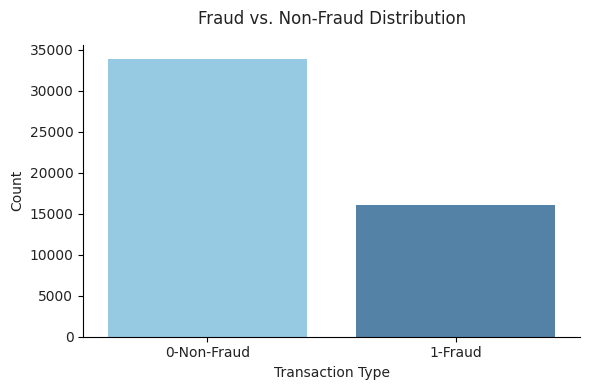

Fraud_Label
0    67.866
1    32.134
Name: proportion, dtype: float64


In [12]:
# Class imbalance visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Fraud_Label'], palette=['#89CFF0', '#4682B4'])

# Title and Labels
plt.title("Fraud vs. Non-Fraud Distribution", pad=15, color='#222222')
plt.xlabel("Transaction Type", color='#222222')
plt.ylabel("Count", color='#222222')

# Tick labels styling
plt.xticks([0, 1], ['0-Non-Fraud', '1-Fraud'], color='#222222')
plt.yticks(color='#222222')

# Remove grid lines
sns.despine()
plt.grid(False)

plt.tight_layout()
plt.show()

# Print percentage of fraud cases
fraud_percent = df['Fraud_Label'].value_counts(normalize=True) * 100
print(fraud_percent)


The dataset is  imbalanced, with a significantly lower number of fraud cases compared to non-fraudulent ones. This can lead models to favor the majority class unless addressed. This has been addressed in the Data Preprocessing stage


## Feature Distribution

We plot histograms of the numerical features to observe their distributions and identify any skewedness.


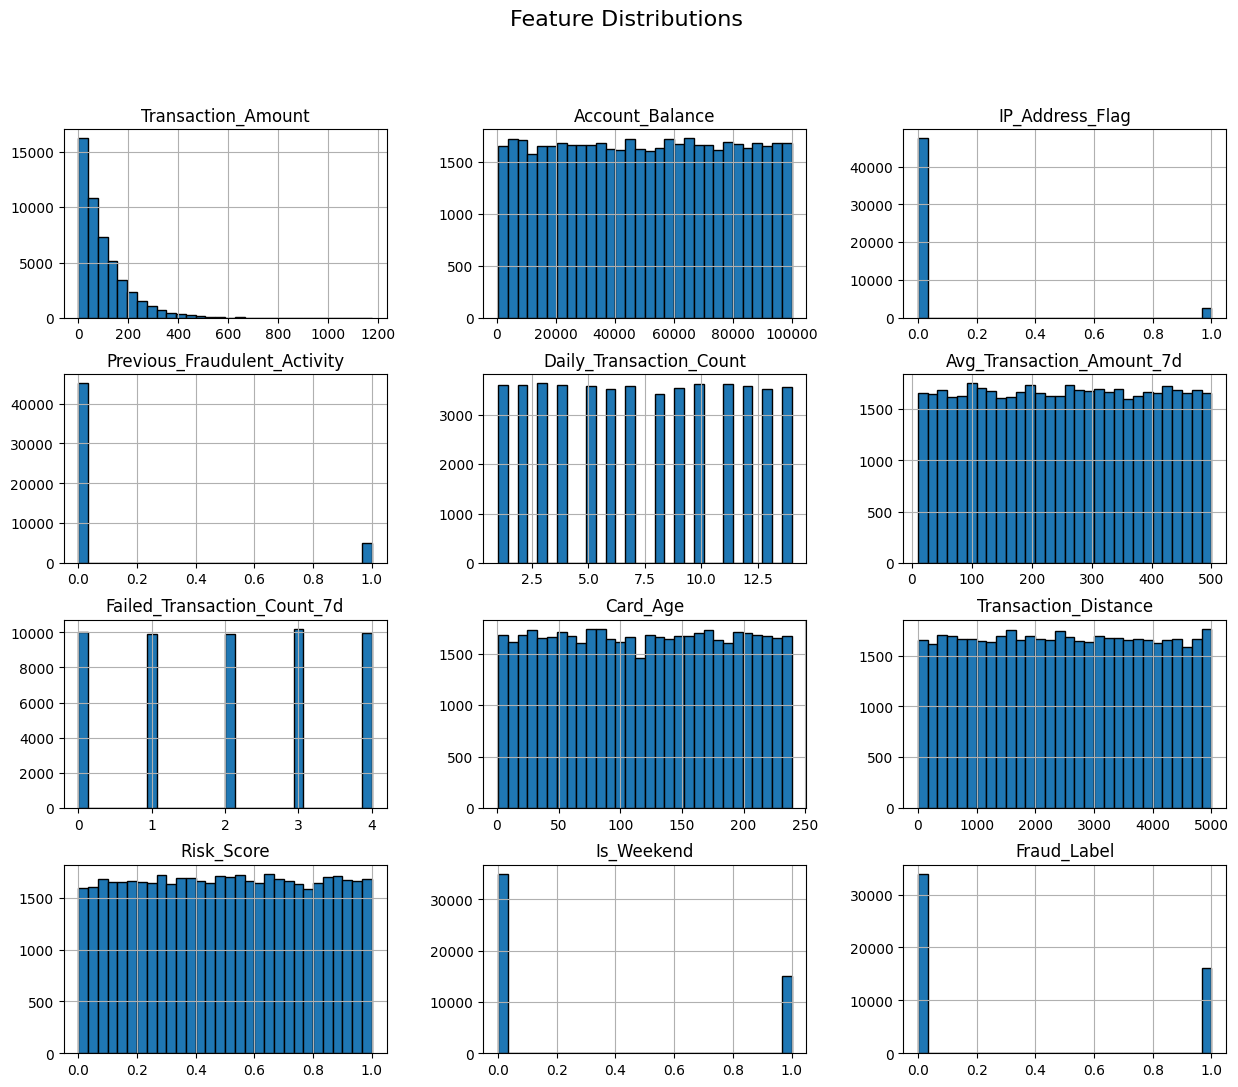

In [13]:
# Plot histograms for all numerical features
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

## Looking for Correlations

A heatmap is used to identify highly correlated features, which can inform feature selection and model performance.


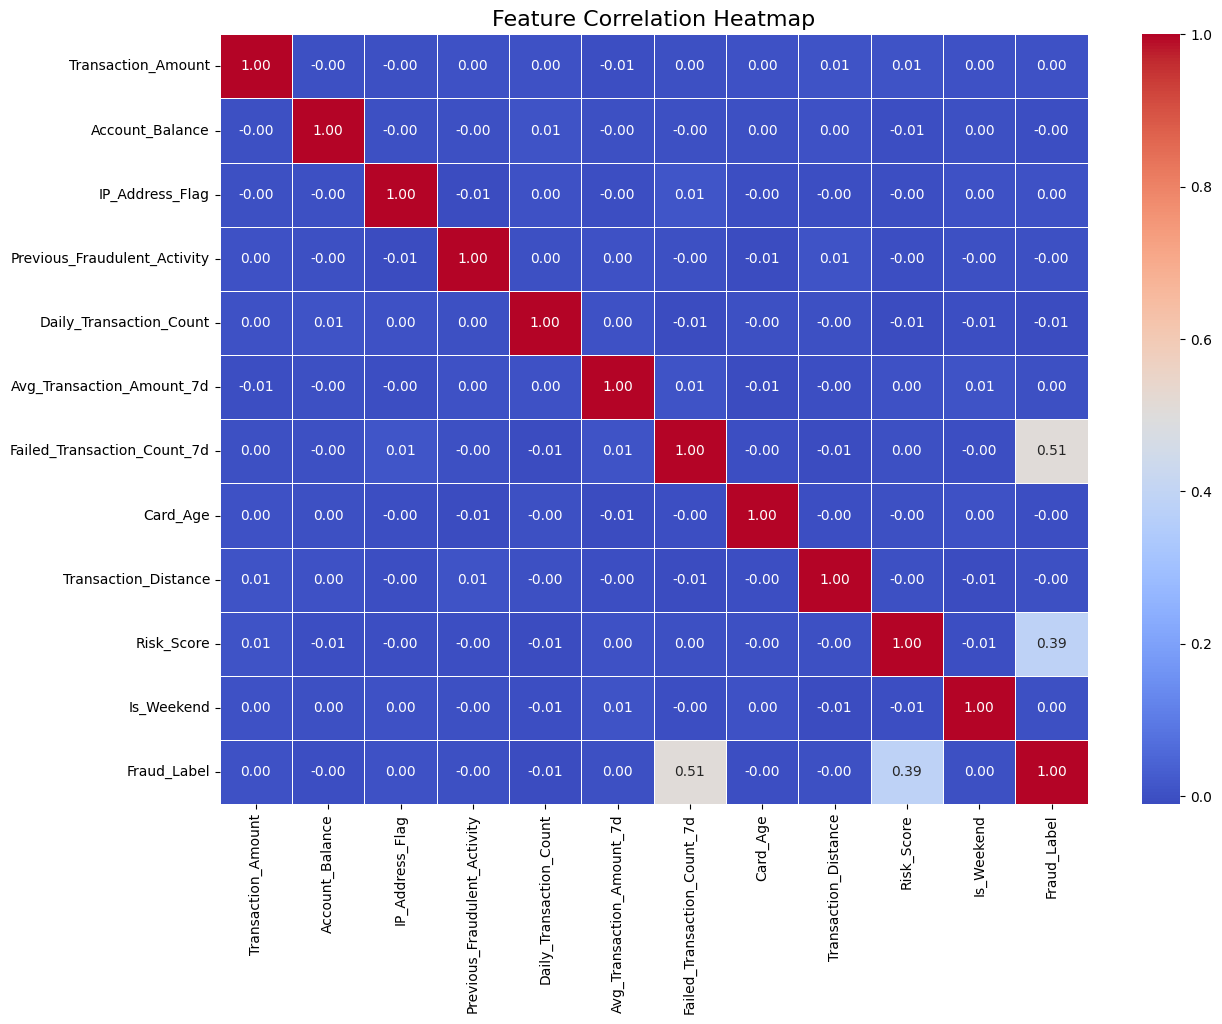

In [14]:
# Calculate correlation only for numerical features
plt.figure(figsize=(14, 10))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

## Prepare the Data for Machine Learning Algorithms

## Data Cleaning and Preprocessing

## Dropping Irrelevant Columns

In [15]:
# Dropping Irrelevant Features as they do not contribute to fraud detection and may cause data leakage

df.drop(columns=[
    'Transaction_ID',       # Unique ID
    'User_ID',              # Unique ID
    'Timestamp',            # Time info (risk of leakage)
    'Risk_Score',           # Likely calculated after fraud (leakage)
    'Failed_Transaction_Count_7d'  # Potential leakage
], inplace=True)

## Encoding Categorical Variables

In [16]:
# Categorical features are encoded

categorical_cols = ['Transaction_Type', 'Device_Type', 'Location',
                    'Merchant_Category', 'Card_Type', 'Authentication_Method']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

## Train - Test Split

In [17]:
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

In [18]:
# Split dataset into 80% training, 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## Check for Numerical Features

In [19]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the list of numerical features
print("Numerical Features:", numerical_features)

Numerical Features: ['Transaction_Amount', 'Transaction_Type', 'Account_Balance', 'Device_Type', 'Location', 'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Card_Type', 'Card_Age', 'Transaction_Distance', 'Authentication_Method', 'Is_Weekend', 'Fraud_Label']


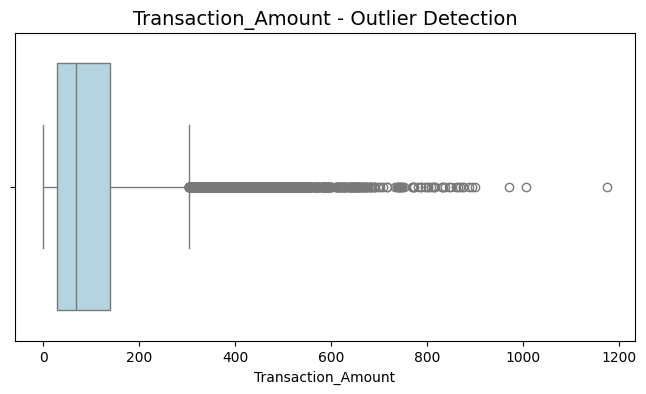

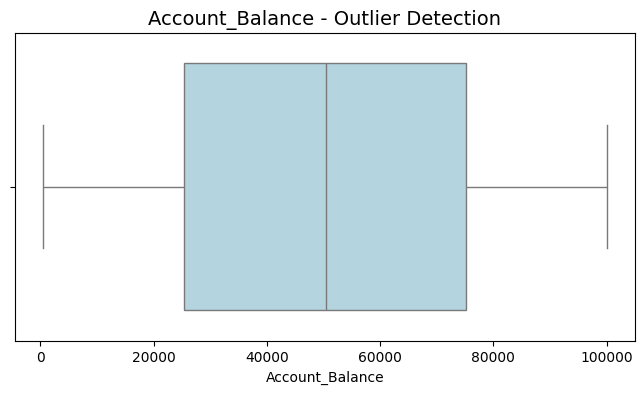

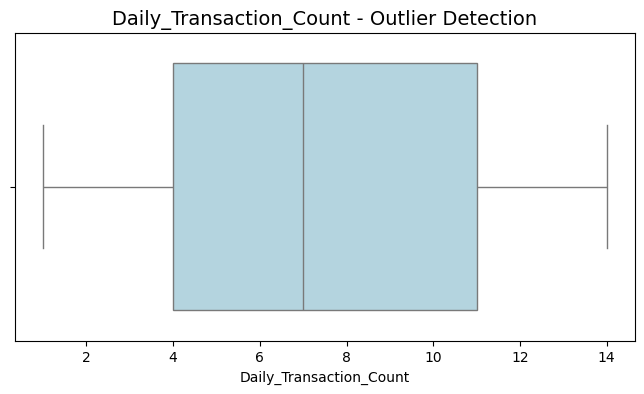

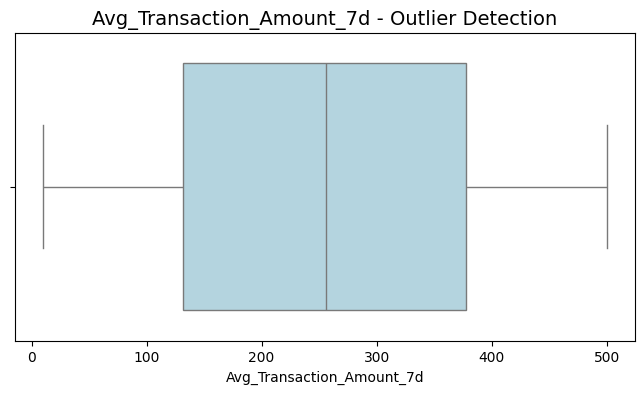

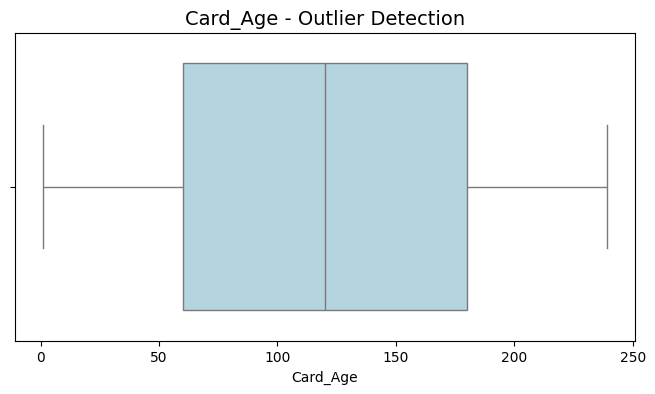

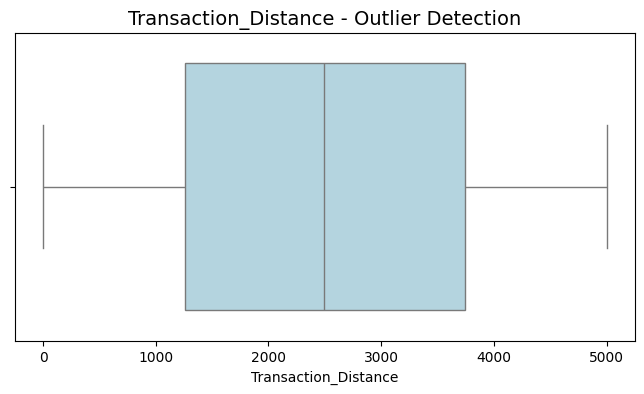

In [20]:
numerical_features = ['Transaction_Amount', 'Account_Balance', 'Daily_Transaction_Count',
                      'Avg_Transaction_Amount_7d', 'Card_Age', 'Transaction_Distance'] #Filter actual continuous numerical features only

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], color='#ADD8E6')
    plt.title(f'{feature} - Outlier Detection', fontsize=14)
    plt.show()

The above visualisation looks into outlier detection on the continuous numerical features using boxplots.

- Transaction_Amount shows clear outliers, which are likely indicative of fraudulent behavior. These high-value transactions may provide crucial signals for fraud detection.
- The other numerical features display reasonably balanced distributions, with no extreme or problematic outliers identified.

Given the nature of fraud detection, where outliers often represent the very behavior we aim to identify, we chose to retain all outliers in the dataset. Removing or modifying these values could result in the loss of important fraud patterns.


## Feature Scaling

In [21]:
# Numerical features are scaled using StandardScaler to ensure that all features contribute equally during model training.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Note :
Feature scaling is a crucial preprocessing step, and its necessity varies depending on the model:

Logistic Regression and Neural Networks require scaled data because they are sensitive to the magnitude of input features. For these models, we apply StandardScaler to standardize the numerical features, ensuring they have a mean of 0 and a standard deviation of 1.

In contrast, Random Forest and XGBoost are tree-based algorithms that are unaffected by feature scaling. These models split data based on feature thresholds rather than numerical magnitudes, so scaling is not necessary in their case.


## Applying SMOTE

In [22]:
# To address the significant class imbalance in the dataset,we apply the SMOTE technique to oversample the minority class (fraud cases)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

Note : SMOTE balancing has been only applied for those models which are sensitive to class imbalance during training (such as Logistic Regression and Neural Networks). Random Forest and XGBoost handle imbalance internally through class weighting and boosting strategies. This comparison is intentional to observe how each model handles imbalance.


## Model Training , Evaluation and Fine-Tuning

In this section, we explore various machine learning models for fraud detection, evaluating their baseline performance and fine-tuning them to optimize their effectiveness. The goal is to identify the most accurate and balanced model that maximizes fraud detection while minimizing false positives.

## Logistic Regression

In [23]:
# Train a simple baseline Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred = log_reg.predict(X_test_scaled)

print("\n Logistic Regression Performance:")
print(classification_report(y_test, y_pred))


 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.68      0.49      0.57      6787
           1       0.32      0.51      0.39      3213

    accuracy                           0.49     10000
   macro avg       0.50      0.50      0.48     10000
weighted avg       0.56      0.49      0.51     10000



## Random Forest

In [53]:
# Initialize Random Forest
rf_baseline = RandomForestClassifier( n_estimators=100, random_state=42
)

# The baseline Random Forest model was trained on the original, imbalanced dataset without applying SMOTE or class balancing techniques.
rf_baseline.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_baseline = rf_baseline.predict(X_test)

# Evaluate the model
print("\n Baseline Random Forest Performance:")
print(classification_report(y_test, y_pred_rf_baseline))


 Baseline Random Forest Performance:
              precision    recall  f1-score   support

           0       0.68      0.99      0.81      6787
           1       0.26      0.00      0.01      3213

    accuracy                           0.68     10000
   macro avg       0.47      0.50      0.41     10000
weighted avg       0.54      0.68      0.55     10000



##  Random Forest - Fine Tuning

In [ ]:
# Define the hyperparameter search space
param_dist = {
    'n_estimators': np.arange(100, 301, 50),   # Number of trees
    'max_depth': [10, 20, 30, None],           # Depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],             # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],          # Features to consider at each split
    'class_weight': ['balanced']               # Handling imbalance
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Setup Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,               # Try 20 random combinations
    scoring='f1',            # Optimize for F1 (fraud balance)
    cv=3,                    # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on the original training data (no SMOTE)
random_search.fit(X_train, y_train)

# Best parameters and score
print("\n Best Parameters:", random_search.best_params_)
print(" Best F1 Score during training:", random_search.best_score_)

# Get the best model from the search
best_rf = random_search.best_estimator_

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate on test set
print("\n Fine-Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced'}
 Best F1 Score during training: 0.2923006847868221

 Fine-Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      6787
           1       0.32      0.29      0.31      3213

    accuracy                           0.58     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.57      0.58      0.57     10000



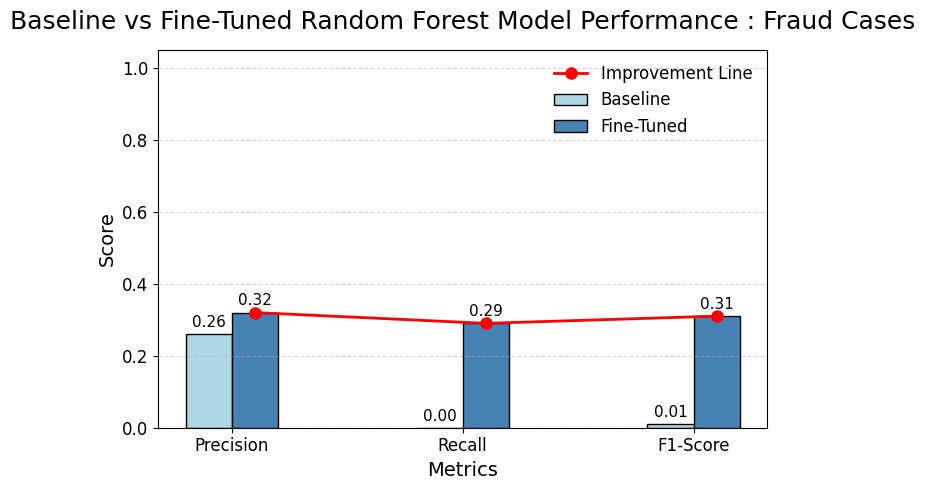

In [ ]:
 #Comparing baseline and fine-tuned random forest (fraud cases)
# Metric values
metrics = ['Precision', 'Recall', 'F1-Score']
baseline_scores = [0.26, 0.00, 0.01]
tuned_scores = [0.32, 0.29, 0.31]

# Bar width and positions
x = np.arange(len(metrics))
width = 0.2

# Define light and dark blue colors
baseline_color = '#ADD8E6'
tuned_color = '#4682B4'

# Figure size
plt.figure(figsize=(7, 5))

# Bars
plt.bar(x - width/2, baseline_scores, width, label='Baseline', color=baseline_color, edgecolor='black')
plt.bar(x + width/2, tuned_scores, width, label='Fine-Tuned', color=tuned_color, edgecolor='black')

# Improvement line
plt.plot(x + width/2, tuned_scores, color='red', marker='o', markersize=8, linewidth=2, label='Improvement Line')

# Labels and title (now regular weight)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Baseline vs Fine-Tuned Random Forest Model Performance : Fraud Cases', fontsize=18, pad=15)
plt.xticks(x, metrics, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)

# Annotate exact values
for i in range(len(metrics)):
    plt.text(x[i] - width/2, baseline_scores[i] + 0.02, f'{baseline_scores[i]:.2f}', ha='center', fontsize=11)
    plt.text(x[i] + width/2, tuned_scores[i] + 0.02, f'{tuned_scores[i]:.2f}', ha='center', fontsize=11)

# Legend
plt.legend(fontsize=12, frameon=False, loc='upper right')

# Subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

The visualization above compares the performance of the Baseline and Fine-Tuned Random Forest models in detecting fraudulent transactions, highlighting the improvements achieved through hyperparameter tuning.

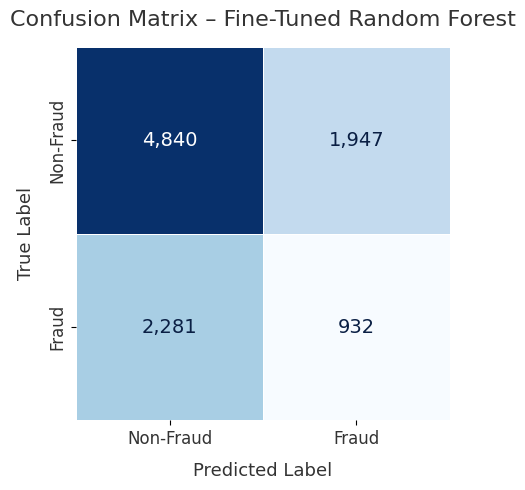

In [ ]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_rf)

# Create figure
fig, ax = plt.subplots(figsize=(7, 5))

# Heatmap with a soft, light blue palette
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',  # Soft blues
    linewidths=0.7,
    linecolor='white',
    cbar=False,
    annot_kws={"size": 14, "weight": "normal"},  # Regular weight
    square=True
)

# Titles and labels
plt.title('Confusion Matrix – Fine-Tuned Random Forest', fontsize=16, color='#333333', pad=15)
plt.xlabel('Predicted Label', fontsize=13, color='#333333', labelpad=10)
plt.ylabel('True Label', fontsize=13, color='#333333', labelpad=10)

# Custom tick labels
plt.xticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12, color='#333333')
plt.yticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12, color='#333333')

# Adjust text color inside the cells dynamically
for t in ax.texts:
    value = int(t.get_text())
    t.set_text(f'{value:,}')  # Adds comma formatting for large numbers
    if value > (cm.max() / 2):
        t.set_color('white')
    else:
        t.set_color('#0A1F44')  # Dark navy on lighter cells

plt.tight_layout()
plt.show()


Breakdown of the Confusion Matrix:

1. True Positives (Fraud correctly detected) = 932

2. True Negatives (Non-Fraud correctly classified) = 4,840

3. False Positives (Non-Fraud wrongly classified as Fraud) = 1,947

4. False Negatives (Fraud wrongly classified as Non-Fraud) = 2,281

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize XGBoost model (baseline, no tuning)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\n XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


 XGBoost Performance:
              precision    recall  f1-score   support

           0       0.68      0.95      0.79      6787
           1       0.33      0.05      0.09      3213

    accuracy                           0.66     10000
   macro avg       0.50      0.50      0.44     10000
weighted avg       0.57      0.66      0.57     10000



## XGBOOST - Fine Tuning

In [61]:
from collections import Counter

# Calculate the exact scale_pos_weight from training data
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]
print(f"Exact scale_pos_weight: {scale_pos_weight}")

Exact scale_pos_weight: 2.1118717908822155


In [60]:
# Use your calculated scale_pos_weight
scale_pos_weight = 2.11

# Define improved hyperparameter search space
param_dist = {
    'n_estimators': np.arange(100, 301, 50),        # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],                    # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1],            # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],                  # Randomly sample training data
    'colsample_bytree': [0.7, 0.8, 1.0],           # Randomly sample features
    'scale_pos_weight': [1.5, 2.11, 2.5]           # Focus around your calculated value
}

# Initialize XGBoost model
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Setup RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,                  #  20 random combinations
    scoring='f1',               # Optimize for fraud F1 score
    cv=3,                       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run the fine-tuning
random_search_xgb.fit(X_train, y_train)

# Show best parameters
print("\n Best Parameters:", random_search_xgb.best_params_)
print(" Best F1 Score during training:", random_search_xgb.best_score_)

# Get the best model
best_xgb = random_search_xgb.best_estimator_

# Predict on the test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate performance
print("\n Improved Fine-Tuned XGBoost Performance:")
print(classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:30:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 2.5, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
 Best F1 Score during training: 0.48022244652420953

 Improved Fine-Tuned XGBoost Performance:
              precision    recall  f1-score   support

           0       0.68      0.02      0.04      6787
           1       0.32      0.98      0.48      3213

    accuracy                           0.33     10000
   macro avg       0.50      0.50      0.26     10000
weighted avg       0.57      0.33      0.18     10000



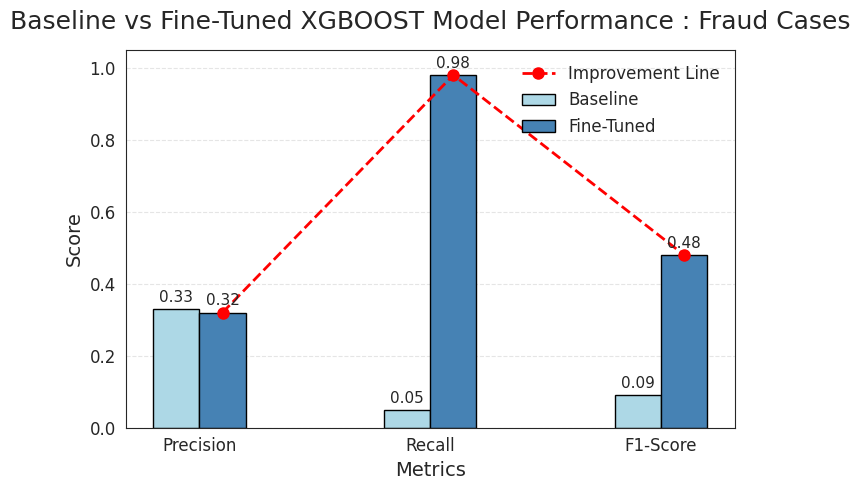

In [59]:
#Comparing baseline and fine-tuned XGBOOST
# Metric names
metrics = ['Precision', 'Recall', 'F1-Score']

# XGBoost performance values
baseline_scores = [0.33, 0.05, 0.09]   # Baseline XGBoost scores
tuned_scores = [0.32, 0.98, 0.48]      # Fine-tuned XGBoost scores

# Adjust positions to reduce gaps
x = np.arange (len(metrics))
width = 0.2  # Bar width

# Colors
baseline_color = '#ADD8E6'
tuned_color = '#4682B4'

# Create the figure
plt.figure(figsize=(7, 5))

# Plot bars
plt.bar(x - width/2, baseline_scores, width, label='Baseline', color=baseline_color, edgecolor='black')
plt.bar(x + width/2, tuned_scores, width, label='Fine-Tuned', color=tuned_color, edgecolor='black')

# Improvement line
plt.plot(x + width/2, tuned_scores, color='red', linestyle='--', marker='o', markersize=8, linewidth=2, label='Improvement Line')

# Labels and title
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Baseline vs Fine-Tuned XGBOOST Model Performance : Fraud Cases', fontsize=18, pad=15)
plt.xticks(x, metrics, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)

# Annotate the values
for i in range(len(metrics)):
    plt.text(x[i] - width/2, baseline_scores[i] + 0.02, f'{baseline_scores[i]:.2f}', ha='center', fontsize=11)
    plt.text(x[i] + width/2, tuned_scores[i] + 0.02, f'{tuned_scores[i]:.2f}', ha='center', fontsize=11)

# Legend
plt.legend(fontsize=12, frameon=False, loc='upper right')

# Subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

The visualization above compares the performance of the Baseline and Fine-Tuned XGBOOST model in detecting fraudulent transactions, highlighting the improvements achieved through hyperparameter tuning.

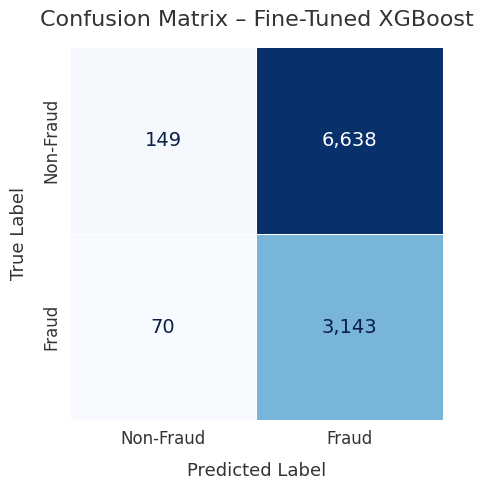

In [58]:
# Get the confusion matrix for fine-tuned XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Create figure
fig, ax = plt.subplots(figsize=(7, 5))

# Heatmap with a soft, light blue palette
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt='d',
    cmap='Blues',  # Soft blue palette
    linewidths=0.7,
    linecolor='white',
    cbar=False,
    annot_kws={"size": 14, "weight": "normal"},  # Regular weight
    square=True
)

# Titles and labels
plt.title('Confusion Matrix – Fine-Tuned XGBoost', fontsize=16, color='#333333', pad=15)
plt.xlabel('Predicted Label', fontsize=13, color='#333333', labelpad=10)
plt.ylabel('True Label', fontsize=13, color='#333333', labelpad=10)

# Custom tick labels
plt.xticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12, color='#333333')
plt.yticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12, color='#333333')

# Adjust text color inside the cells dynamically
for t in ax.texts:
    value = int(t.get_text())
    t.set_text(f'{value:,}')
    if value > (cm_xgb.max() / 2):
        t.set_color('white')
    else:
        t.set_color('#0A1F44')

plt.tight_layout()
plt.show()


Breakdown of the Confusion Matrix:
1. True Positives (Fraud correctly detected) = 3,143

2. True Negatives (Non-Fraud correctly classified) = 149

3. False Positives (Non-Fraud wrongly classified as Fraud) = 6,638

4. False Negatives (Fraud wrongly classified as Non-Fraud) = 70


## Neural Network

In [ ]:
# Build the baseline Neural Network
nn_baseline = Sequential()
nn_baseline.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_baseline.add(Dense(16, activation='relu'))
nn_baseline.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
nn_baseline.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the baseline model (no class weights, no early stopping)
nn_baseline.fit(
    X_train_scaled, y_train,
    epochs=10,                # Small number of epochs for baseline
    batch_size=32,
    verbose=2,
    validation_split=0.2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1000/1000 - 4s - 4ms/step - accuracy: 0.6735 - loss: 0.6366 - val_accuracy: 0.6801 - val_loss: 0.6325
Epoch 2/10
1000/1000 - 5s - 5ms/step - accuracy: 0.6783 - loss: 0.6293 - val_accuracy: 0.6801 - val_loss: 0.6298
Epoch 3/10
1000/1000 - 2s - 2ms/step - accuracy: 0.6783 - loss: 0.6278 - val_accuracy: 0.6801 - val_loss: 0.6306
Epoch 4/10
1000/1000 - 3s - 3ms/step - accuracy: 0.6783 - loss: 0.6268 - val_accuracy: 0.6801 - val_loss: 0.6305
Epoch 5/10
1000/1000 - 3s - 3ms/step - accuracy: 0.6783 - loss: 0.6260 - val_accuracy: 0.6801 - val_loss: 0.6312
Epoch 6/10
1000/1000 - 3s - 3ms/step - accuracy: 0.6782 - loss: 0.6253 - val_accuracy: 0.6801 - val_loss: 0.6304
Epoch 7/10
1000/1000 - 4s - 4ms/step - accuracy: 0.6783 - loss: 0.6249 - val_accuracy: 0.6800 - val_loss: 0.6306
Epoch 8/10
1000/1000 - 3s - 3ms/step - accuracy: 0.6784 - loss: 0.6242 - val_accuracy: 0.6801 - val_loss: 0.6308
Epoch 9/10
1000/1000 - 3s - 3ms/step - accuracy: 0.6781 - loss: 0.6235 - val_accuracy: 0.6798 - 

In [ ]:
# Predict probabilities
y_pred_prob_nn_baseline = nn_baseline.predict(X_test_scaled)
# Convert probabilities to binary output
y_pred_nn_baseline = (y_pred_prob_nn_baseline > 0.5).astype(int)

# Evaluate the baseline model
print("\n Baseline Neural Network Performance:")
print(classification_report(y_test, y_pred_nn_baseline))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

 Baseline Neural Network Performance:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      6787
           1       0.50      0.00      0.00      3213

    accuracy                           0.68     10000
   macro avg       0.59      0.50      0.41     10000
weighted avg       0.62      0.68      0.55     10000



##  Neural Network - Fine Tuning

In [ ]:
# Compute class weights
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))
print("Class weights:", class_weights)

# Build the fine-tuned Neural Network
nn_finetuned = Sequential()
nn_finetuned.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_finetuned.add(Dropout(0.3))  # Dropout for regularization
nn_finetuned.add(Dense(32, activation='relu'))
nn_finetuned.add(Dropout(0.3))
nn_finetuned.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
nn_finetuned.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the fine-tuned model
history = nn_finetuned.fit(
    X_train_scaled, y_train,
    epochs=50,                   # More epochs
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=2
)

Class weights: {0: 0.7367567965814484, 1: 1.5559358954411078}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 - 4s - 4ms/step - accuracy: 0.4910 - loss: 0.7026 - val_accuracy: 0.4423 - val_loss: 0.6969
Epoch 2/50
1000/1000 - 5s - 5ms/step - accuracy: 0.4771 - loss: 0.6946 - val_accuracy: 0.4358 - val_loss: 0.6957
Epoch 3/50
1000/1000 - 3s - 3ms/step - accuracy: 0.5051 - loss: 0.6934 - val_accuracy: 0.3961 - val_loss: 0.6992
Epoch 4/50
1000/1000 - 4s - 4ms/step - accuracy: 0.4880 - loss: 0.6934 - val_accuracy: 0.4060 - val_loss: 0.6959
Epoch 5/50
1000/1000 - 3s - 3ms/step - accuracy: 0.4763 - loss: 0.6935 - val_accuracy: 0.6086 - val_loss: 0.6891
Epoch 6/50
1000/1000 - 3s - 3ms/step - accuracy: 0.4905 - loss: 0.6930 - val_accuracy: 0.4029 - val_loss: 0.6962
Epoch 7/50
1000/1000 - 3s - 3ms/step - accuracy: 0.4787 - loss: 0.6930 - val_accuracy: 0.4381 - val_loss: 0.6947
Epoch 8/50
1000/1000 - 4s - 4ms/step - accuracy: 0.4746 - loss: 0.6927 - val_accuracy: 0.5318 - val_loss: 0.6916
Epoch 9/50
1000/1000 - 5s - 5ms/step - accuracy: 0.4962 - loss: 0.6928 - val_accuracy: 0.4591 - val_loss: 0

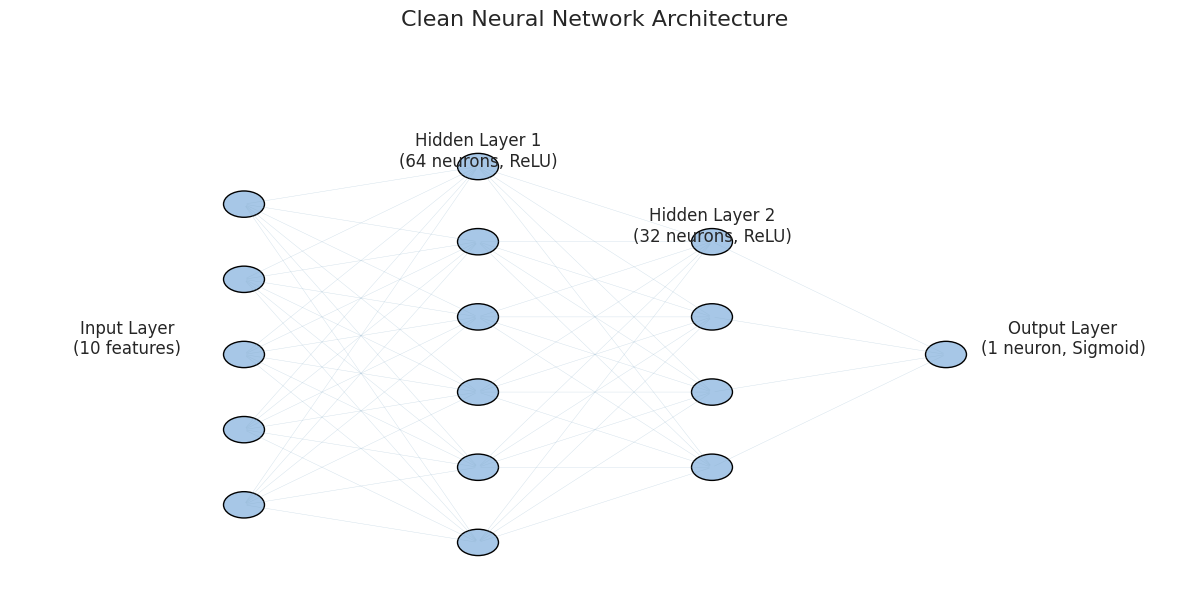

In [62]:
# Simplified version for aesthetics
display_neurons = {
    'input': 5,
    'hidden1': 6,
    'hidden2': 4,
    'output': 1
}

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Define layer positions
layer_sizes = [display_neurons['input'], display_neurons['hidden1'],
               display_neurons['hidden2'], display_neurons['output']]
x_spacing = 4
y_spacing = 2

# Draw neurons
for i, layer_size in enumerate(layer_sizes):
    x = i * x_spacing
    for j in range(layer_size):
        y = j * y_spacing - (layer_size - 1) * y_spacing / 2
        neuron = Circle((x, y), radius=0.35, edgecolor='black', facecolor='#A7C7E7')
        ax.add_patch(neuron)

for i in range(len(layer_sizes) - 1):
    x_start = i * x_spacing
    x_end = (i + 1) * x_spacing
    for j in range(layer_sizes[i]):
        y_start = j * y_spacing - (layer_sizes[i] - 1) * y_spacing / 2
        for k in range(layer_sizes[i + 1]):
            y_end = k * y_spacing - (layer_sizes[i + 1] - 1) * y_spacing / 2
            connection = FancyArrowPatch((x_start, y_start), (x_end, y_end),
                                         arrowstyle='-', color='#89AFC9', linewidth=0.3, alpha=0.4)
            ax.add_patch(connection)

# Add labels
plt.text(-2, 0, 'Input Layer\n(10 features)', fontsize=12, ha='center')
plt.text(x_spacing, 5, 'Hidden Layer 1\n(64 neurons, ReLU)', fontsize=12, ha='center')
plt.text(x_spacing * 2, 3, 'Hidden Layer 2\n(32 neurons, ReLU)', fontsize=12, ha='center')
plt.text(x_spacing * 3 + 2, 0, 'Output Layer\n(1 neuron, Sigmoid)', fontsize=12, ha='center')

# Title
plt.title('Clean Neural Network Architecture', fontsize=16, pad=20)
plt.xlim(-4, x_spacing * (len(layer_sizes)))
plt.ylim(-6, 8)
plt.tight_layout()
plt.show()


In [45]:
# Predict probabilities
y_pred_prob_nn_finetuned = nn_finetuned.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred_nn_finetuned = (y_pred_prob_nn_finetuned > 0.5).astype(int)

# Evaluate the fine-tuned model
print("\n Fine-Tuned Neural Network Performance:")
print(classification_report(y_test, y_pred_nn_finetuned))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

 Fine-Tuned Neural Network Performance:
              precision    recall  f1-score   support

           0       0.68      0.82      0.75      6787
           1       0.34      0.19      0.24      3213

    accuracy                           0.62     10000
   macro avg       0.51      0.51      0.49     10000
weighted avg       0.57      0.62      0.58     10000



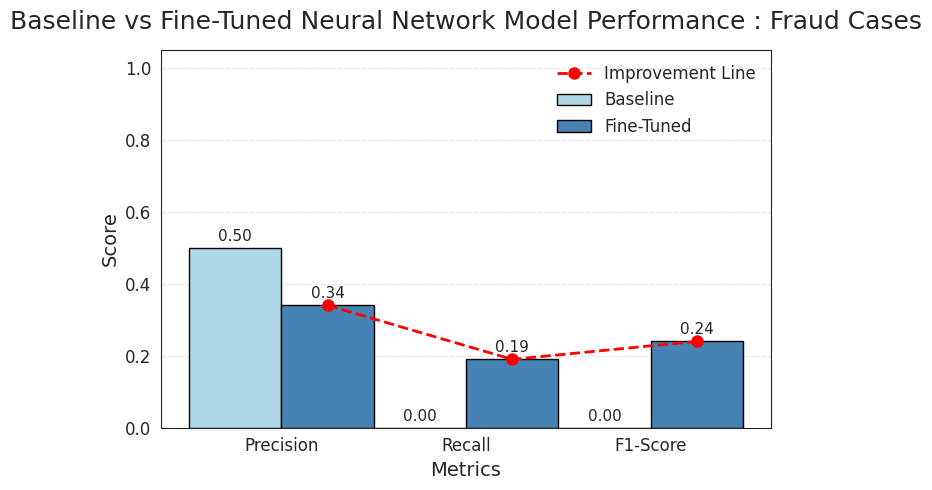

In [57]:
# Metric names
metrics = ['Precision', 'Recall', 'F1-Score']

# Neural Network performance values
baseline_scores = [0.50, 0.00, 0.00]   # Baseline Neural Network scores (for class 1)
tuned_scores = [0.34, 0.19, 0.24]      # Fine-Tuned Neural Network scores (for class 1)

# Adjust positions to reduce gaps
x = np.linspace(0, 1, len(metrics))
width = 0.25  # Bar width

# Colors
baseline_color = '#ADD8E6'
tuned_color = '#4682B4'

# Create the figure
plt.figure(figsize=(7, 5))

# Plot bars
plt.bar(x - width/2, baseline_scores, width, label='Baseline', color=baseline_color, edgecolor='black')
plt.bar(x + width/2, tuned_scores, width, label='Fine-Tuned', color=tuned_color, edgecolor='black')

# Improvement line
plt.plot(x + width/2, tuned_scores, color='red', linestyle='--', marker='o', markersize=8, linewidth=2, label='Improvement Line')

# Labels and title
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Baseline vs Fine-Tuned Neural Network Model Performance : Fraud Cases', fontsize=18, pad=15)
plt.xticks(x, metrics, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)

# Annotate the values
for i in range(len(metrics)):
    plt.text(x[i] - width/2, baseline_scores[i] + 0.02, f'{baseline_scores[i]:.2f}', ha='center', fontsize=11)
    plt.text(x[i] + width/2, tuned_scores[i] + 0.02, f'{tuned_scores[i]:.2f}', ha='center', fontsize=11)

# Legend
plt.legend(fontsize=12, frameon=False, loc='upper right')

# Subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


 The visualization above compares the performance of the Baseline and Fine-Tuned Neural Network models in detecting fraudulent transactions, highlighting the improvements achieved through hyperparameter tuning.

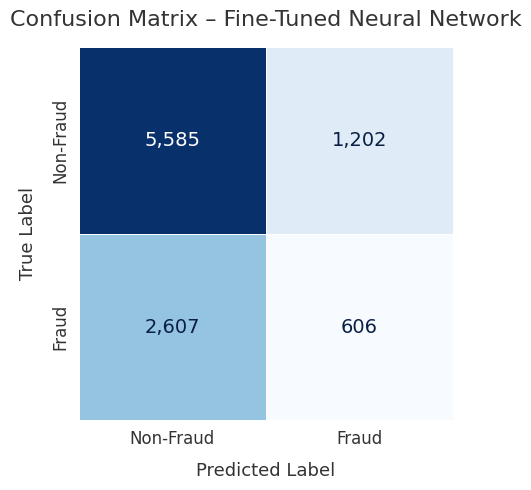

In [65]:
# Get the confusion matrix for the fine-tuned Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn_finetuned)

# Create figure
fig, ax = plt.subplots(figsize=(7, 5))

# Heatmap with a soft, light blue palette
sns.heatmap(
    cm_nn,
    annot=True,
    fmt='d',
    cmap='Blues',  # Soft blue palette
    linewidths=0.7,
    linecolor='white',
    cbar=False,
    annot_kws={"size": 14, "weight": "normal"},  # Regular weight
    square=True
)

# Titles and labels
plt.title('Confusion Matrix – Fine-Tuned Neural Network', fontsize=16, color='#333333', pad=15)
plt.xlabel('Predicted Label', fontsize=13, color='#333333', labelpad=10)
plt.ylabel('True Label', fontsize=13, color='#333333', labelpad=10)

# Custom tick labels
plt.xticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12, color='#333333')
plt.yticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12, color='#333333')

# Adjust text color inside the cells dynamically
for t in ax.texts:
    value = int(t.get_text())
    t.set_text(f'{value:,}')  # Comma formatting for large numbers
    if value > (cm_nn.max() / 2):
        t.set_color('white')  # White text on darker cells
    else:
        t.set_color('#0A1F44')  # Dark navy on lighter cells

plt.tight_layout()
plt.show()


Confusion Matrix Breakdown:
1. True Positives (Fraud correctly detected): 606
2. True Negatives (Non-Fraud correctly classified): 5,585
3. False Positives (Non-Fraud wrongly classified as Fraud): 1,202
4. False Negatives (Fraud wrongly classified as Non-Fraud): 2,607

## Combining all Models to find the Best Solution

In [44]:
# Get predictions from fine-tuned XGBoost and Neural Network
xgb_preds = best_xgb.predict_proba(X_test)[:, 1]
nn_preds = nn_finetuned.predict(X_test).flatten()

# Combine predictions into a stacked feature set
stacked_features = np.column_stack((xgb_preds, nn_preds))

# Calculate scale_pos_weight (ratio of classes)
fraud_weight = len(y_test[y_test == 0]) / len(y_test[y_test == 1])
print(f"Scale Pos Weight for Fraud: {fraud_weight:.2f}")

# Define the XGBoost meta-model with stronger fraud focus
meta_model = xgb.XGBClassifier(
    n_estimators=200,            # More trees for stability
    max_depth=4,                 # Deeper trees to capture more patterns
    learning_rate=0.05,          # Slower learning
    scale_pos_weight=fraud_weight,  # Handle imbalance
    subsample=0.8,               # Randomness to reduce overfitting
    colsample_bytree=0.8,        # Same for features
    random_state=42
)

# Train the meta-model
meta_model.fit(stacked_features, y_test)

# Final stacked predictions
final_preds = meta_model.predict(stacked_features)

# Evaluation
print("\nImproved Stacked Model (XGB + NN with boosted fraud focus) Performance:")
print(classification_report(y_test, final_preds))
print(f"Accuracy: {accuracy_score(y_test, final_preds):.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Scale Pos Weight for Fraud: 2.11

Improved Stacked Model (XGB + NN with boosted fraud focus) Performance:
              precision    recall  f1-score   support

           0       0.75      0.55      0.63      6787
           1       0.39      0.61      0.48      3213

    accuracy                           0.57     10000
   macro avg       0.57      0.58      0.55     10000
weighted avg       0.63      0.57      0.58     10000

Accuracy: 0.5674


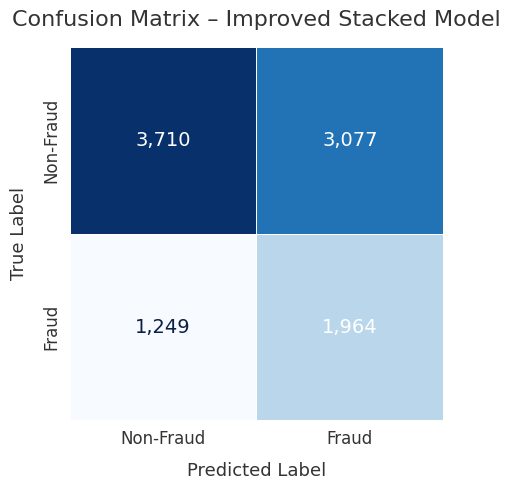

In [63]:
# Get the confusion matrix for the improved stacked model
cm_stack = confusion_matrix(y_test, final_preds)

# Create figure
fig, ax = plt.subplots(figsize=(7, 5))

# Heatmap with the same soft blue palette
sns.heatmap(
    cm_stack,
    annot=True,
    fmt='d',
    cmap='Blues',  # Soft blue palette
    linewidths=0.7,
    linecolor='white',
    cbar=False,
    annot_kws={"size": 14, "weight": "normal"},  # Regular weight
    square=True
)

# Titles and labels
plt.title('Confusion Matrix – Improved Stacked Model', fontsize=16, color='#333333', pad=15)
plt.xlabel('Predicted Label', fontsize=13, color='#333333', labelpad=10)
plt.ylabel('True Label', fontsize=13, color='#333333', labelpad=10)

# Custom tick labels
plt.xticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12, color='#333333')
plt.yticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12, color='#333333')

# Adjust text color dynamically based on cell value
for t in ax.texts:
    value = int(t.get_text())
    t.set_text(f'{value:,}')
    if value > (cm_stack.max() / 2):
        t.set_color('white')
    else:
        t.set_color('#0A1F44')

plt.tight_layout()
plt.show()


Breakdown of the Confusion Matrix:
1. True Positives (Fraud correctly detected): 1,964
2. True Negatives (Non-Fraud correctly classified): 3,710
3. False Positives (Non-Fraud wrongly classified as Fraud): 3,077
4. False Negatives (Fraud wrongly classified as Non-Fraud): 1,249

### Evaluating Models to Determine the Optimal Solution

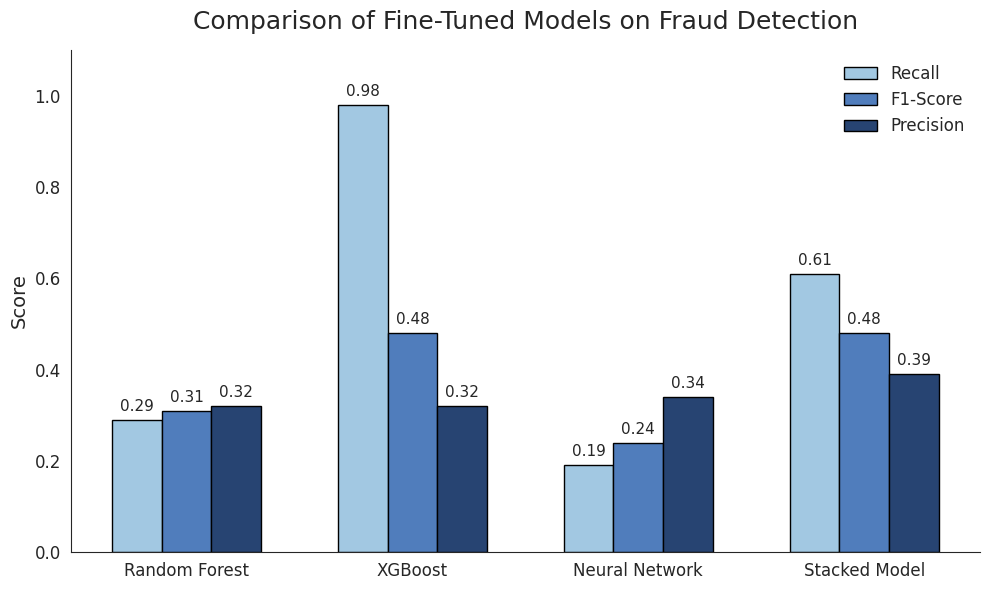

In [54]:
# Data from fine-tuned models
models = ['Random Forest', 'XGBoost', 'Neural Network', 'Stacked Model']
fraud_recall = [0.29, 0.98, 0.19, 0.61]
fraud_f1 = [0.31, 0.48, 0.24, 0.48]
fraud_precision = [0.32, 0.32, 0.34, 0.39]

x = np.arange(len(models))
width = 0.22

# Set style
sns.set_style('white')  # clean background, no grid

# Custom color palette
colors = ['#A2C8E2', '#507DBC', '#274472']

# Create the figure
plt.figure(figsize=(10, 6))

# Bars
plt.bar(x - width, fraud_recall, width, label='Recall', color=colors[0], edgecolor='black')
plt.bar(x, fraud_f1, width, label='F1-Score', color=colors[1], edgecolor='black')
plt.bar(x + width, fraud_precision, width, label='Precision', color=colors[2], edgecolor='black')

# Value labels
for i in range(len(models)):
    plt.text(x[i] - width, fraud_recall[i] + 0.02, f"{fraud_recall[i]:.2f}", ha='center', fontsize=11)
    plt.text(x[i], fraud_f1[i] + 0.02, f"{fraud_f1[i]:.2f}", ha='center', fontsize=11)
    plt.text(x[i] + width, fraud_precision[i] + 0.02, f"{fraud_precision[i]:.2f}", ha='center', fontsize=11)

# Titles and labels
plt.title('Comparison of Fine-Tuned Models on Fraud Detection', fontsize=18, pad=15)
plt.ylabel('Score', fontsize=14)
plt.xticks(x, models, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.1)
plt.legend(fontsize=12, frameon=False, loc='upper right')

# Remove gridlines
plt.grid(False)

# Remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

###  Final Model Selection: Stacked Model

After evaluating multiple models for fraud detection, including Random Forest, XGBoost, and Neural Networks, the Stacked Model (XGBoost + NN) emerged as the best-performing approach.

While XGBoost had the highest recall (98%), it generated an excessive number of false positives, making it impractical for real-world use. The Neural Network, on the other hand, struggled to detect fraud effectively, missing too many fraudulent cases.

The Stacked Model balances precision and recall, reducing false positives while maintaining strong fraud detection capabilities. This makes it the most viable solution for deployment in fraud detection systems.


In [56]:
from datetime import datetime
## extra code to save the classification report

def save_classification_report(y_test, y_preds, model_name):
    """
    Saves a classification report with a timestamp to prevent overwriting.
    """
    report_dict = classification_report(y_test, y_preds, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()

    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"{model_name}_classification_report_{timestamp}"

    # Save as CSV & TXT
    df_report.to_csv(f"{filename}.csv")
    with open(f"{filename}.txt", "w") as f:
        f.write(classification_report(y_test, y_preds))

    print(f" Classification report saved: {filename}.csv and {filename}.txt")

save_classification_report(y_test, log_reg_preds, "Logistic_Regression")
save_classification_report(y_test, log_reg_preds, "Random_Forest")

 Classification report saved: Logistic_Regression_classification_report_2025-03-09_01-28-00.csv and Logistic_Regression_classification_report_2025-03-09_01-28-00.txt
 Classification report saved: Random_Forest_classification_report_2025-03-09_01-28-00.csv and Random_Forest_classification_report_2025-03-09_01-28-00.txt
